In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_train = pd.read_csv("../data/train_final.csv")
df_test  = pd.read_csv("../data/test_final.csv")

df_train.head()




,title,description,input_format,output_format,rating,difficulty
0,Digits,John gave Jack a very hard problem. He wrote a...,First line contains a positive integer N (1 ≤ ...,"Output exactly three lines, the steps Jack nee...",2500.0,Hard
1,Neural Network country,Due to the recent popularity of the Deep learn...,The first line of input contains N (1 ≤ N ≤ 10...,"Output a single integer, the number of paths D...",2000.0,Hard
2,Property,Bill is a famous mathematician in BubbleLand. ...,The first line contains one integer number n (...,Output contains n distinct integers separated ...,2100.0,Hard
3,Exploration plan,The competitors of Bubble Cup X gathered after...,"The first line contains four integers: V, E, N...",Output a single integer that represents the mi...,2100.0,Hard
4,Casinos and travel,John has just bought a new car and is planning...,"In the first line, a positive integer N (1 ≤ N...","Output one number, the answer to the problem m...",2100.0,Hard


In [2]:
# Fill missing text fields with empty strings
TEXT_COLUMNS = ["title", "description", "input_format", "output_format"]

for col in TEXT_COLUMNS:
    df_train[col] = df_train[col].fillna("")
    df_test[col] = df_test[col].fillna("")

# Recreate combined_text safely
df_train["combined_text"] = (
    df_train["title"] + " " +
    df_train["description"] + " " +
    df_train["input_format"] + " " +
    df_train["output_format"]
)

df_test["combined_text"] = (
    df_test["title"] + " " +
    df_test["description"] + " " +
    df_test["input_format"] + " " +
    df_test["output_format"]
)

# Create text_length feature
df_train["text_length"] = df_train["combined_text"].apply(len)
df_test["text_length"] = df_test["combined_text"].apply(len)



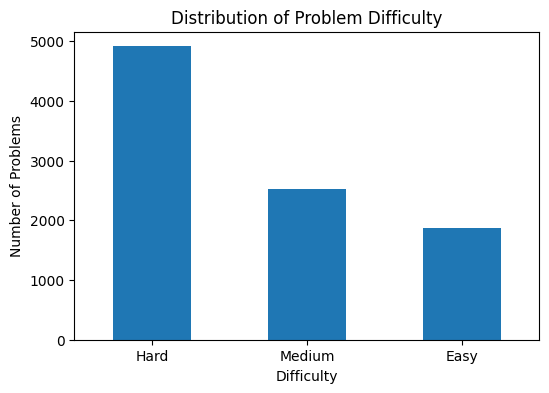

In [3]:
plt.figure(figsize=(6,4))
df_train["difficulty"].value_counts().plot(kind="bar")
plt.title("Distribution of Problem Difficulty")
plt.xlabel("Difficulty")
plt.ylabel("Number of Problems")
plt.xticks(rotation=0)
plt.show()


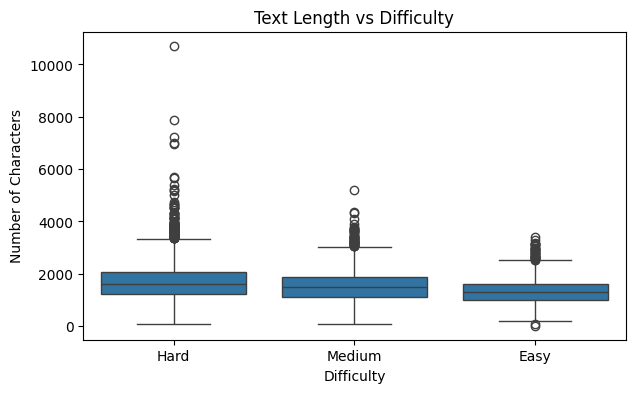

In [4]:
plt.figure(figsize=(7,4))
sns.boxplot(x="difficulty", y="text_length", data=df_train)
plt.title("Text Length vs Difficulty")
plt.xlabel("Difficulty")
plt.ylabel("Number of Characters")
plt.show()


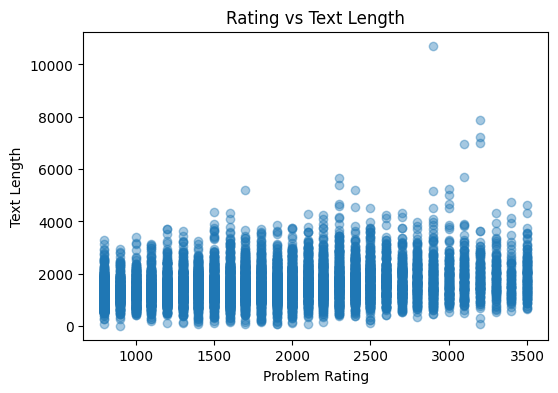

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(df_train["rating"], df_train["text_length"], alpha=0.4)
plt.xlabel("Problem Rating")
plt.ylabel("Text Length")
plt.title("Rating vs Text Length")
plt.show()


In [6]:
from collections import Counter

hard_text = " ".join(df_train[df_train["difficulty"]=="Hard"]["combined_text"])
easy_text = " ".join(df_train[df_train["difficulty"]=="Easy"]["combined_text"])

Counter(hard_text.split()).most_common(15)
Counter(easy_text.split()).most_common(15)


[('the', 28639),
 ('of', 17894),
 ('to', 8234),
 ('a', 8100),
 ('and', 7878),
 ('is', 7453),
 ('The', 5975),
 ('\\le', 5099),
 ('number', 4935),
 ('in', 4932),
 ('test', 4690),
 ('that', 4534),
 ('line', 4396),
 ('contains', 4370),
 ('—', 3809)]

## Exploratory analysis shows that harder programming problems tend to have longer and more information-dense statements, although substantial overlap exists across difficulty levels. Additionally, problem rating exhibits a weak to moderate relationship with text length, indicating that semantic content rather than surface-level features is critical for accurate difficulty prediction. These observations motivate the use of TF-IDF-based textual representations for downstream modeling.